<img src = "https://miro.medium.com/max/875/1*S5rg8bGoy46QFV76pRWHlA.png" />

#### We have used the Alphavantage Api for extracting the stock time series data at https://www.alphavantage.co/documentation/

In [5]:
# STOCKS TO BE USED FOR DATA

# -- GAME STOP => NOT SURE ON THIS check the search file to identify the correct symbol and run the code..
# -- AMC => AMC
# -- BED BATH AND BEYOND  => BBBY
# -- BLACKBERRY => BB
# -- NOKIA => NOK
# -- ROBINHOOD => HOOD
# --  Koss Corp => KOSS
# -- CEL-SCI Corp => CVM (check this)
# -- Tesla

#### Most of the stocks have data ranging from 1999 to 2022

#### Robinhood has data only from 07/2021

In [92]:
import os
import re
import time
import csv
import json
import random
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime

### Let's start with the descriptive analysis of each of the stocks. 

### Let's start with GAMESTOP stock.

#### GameStop 

In [93]:
from alpha_vantage.timeseries import TimeSeries

from pprint import pprint
ts = TimeSeries(key='PLUHCQY6KVM27NLT', output_format='pandas')
gamestop, meta_data = ts.get_daily(symbol='GME',outputsize='full')
gamestop.rename(columns = {'1. open':'open', '2. high':'high',
                              '3. low':'low', '4. close':'close','5. volume':'volume'}, inplace = True)
pprint(gamestop.head(2))

              open      high    low   close     volume
date                                                  
2022-02-07  102.99  105.3849  98.77  102.34  1759360.0
2022-02-04   99.01  104.0000  95.08  102.34  1906791.0


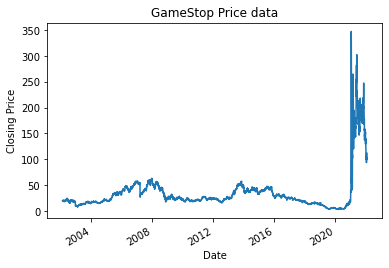

In [94]:
gamestop['close'].plot()
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("GameStop Price data")
plt.show()

In [95]:
gamestop_daily_returns = gamestop['close'].pct_change()
gamestop_monthly_returns = gamestop['close'].resample('M').ffill().pct_change()

In [96]:
print(gamestop_daily_returns.head())

date
2022-02-07         NaN
2022-02-04    0.000000
2022-02-03   -0.030389
2022-02-02    0.008163
2022-02-01    0.125550
Name: close, dtype: float64


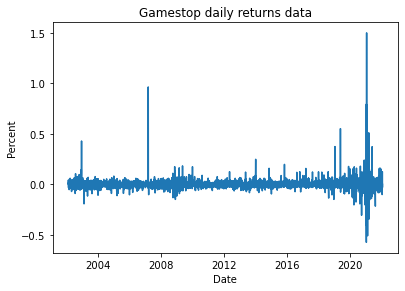

In [97]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(gamestop_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Gamestop daily returns data")
plt.show()

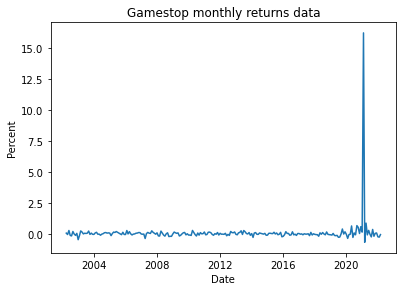

In [98]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(gamestop_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Gamestop monthly returns data")
plt.show()

In [99]:
gamestop_cum_returns = (gamestop_daily_returns + 1).cumprod()

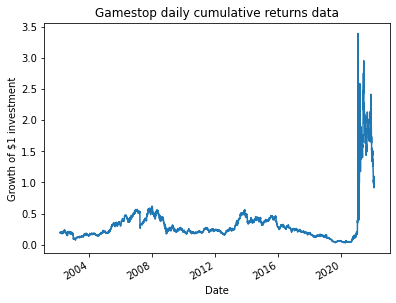

In [100]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
gamestop_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Gamestop daily cumulative returns data")
plt.show()

In [117]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='72R7IZGL7SOKS4BT', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='GME', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for GME stock (60 min)')
plt.show()

ValueError: Thank you for using Alpha Vantage! This is a premium endpoint and there are multiple ways to unlock premium endpoints: (1) become a holder of Alpha Vantage Coin (AVC), an Ethereum-based cryptocurrency that provides various utility & governance functions within the Alpha Vantage ecosystem (AVC mining guide: https://www.alphatournament.com/avc_mining_guide/) to unlock all premium endpoints, (2) subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints

#### AMC

In [124]:
from alpha_vantage.timeseries import TimeSeries

from pprint import pprint
ts = TimeSeries(key='PLUHCQY6KVM27NLT', output_format='pandas')
amc, meta_data = ts.get_daily(symbol='AMC',outputsize='full')
amc.rename(columns = {'1. open':'open', '2. high':'high',
                              '3. low':'low', '4. close':'close','5. volume':'volume'}, inplace = True)

In [102]:
amc_monthly_returns = amc['close'].resample('M').ffill().pct_change()

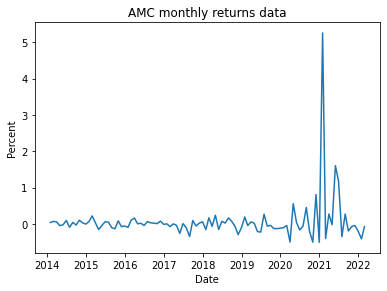

In [103]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(amc_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("AMC monthly returns data")
plt.show()

#### BED BATH AND BEYOND    

In [118]:
from alpha_vantage.timeseries import TimeSeries

from pprint import pprint
ts = TimeSeries(key='PLUHCQY6KVM27NLT', output_format='pandas')
bbby, meta_data = ts.get_daily(symbol='BBBY',outputsize='full')
bbby.rename(columns = {'1. open':'open', '2. high':'high',
                              '3. low':'low', '4. close':'close','5. volume':'volume'}, inplace = True)
bbby.head()

,open,high,low,close,volume
date,,,,,
2022-02-07,16.1900,16.8599,15.9550,16.27,4081368.0
2022-02-04,15.9700,16.3650,15.4700,16.19,5884113.0
2022-02-03,16.6000,16.9200,15.5100,15.88,6428443.0
2022-02-02,16.9500,17.6099,16.3701,17.04,7176271.0
2022-02-01,16.1011,18.0400,16.1011,17.08,8990214.0


<function matplotlib.pyplot.show(close=None, block=None)>

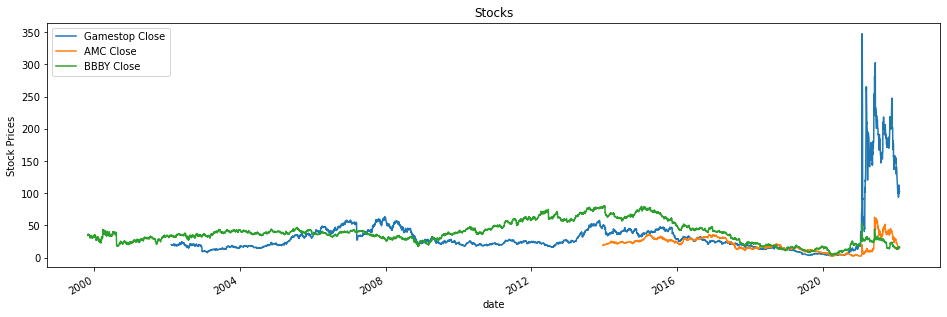

In [120]:
gamestop['close'].plot(label='Gamestop Close', figsize=(16,5))
amc['close'].plot(label='AMC Close')
bbby['close'].plot(label='BBBY Close')
plt.legend()
plt.title('Stocks')
plt.ylabel('Stock Prices')
plt.show

In [122]:
gamestop['returns'] = (gamestop['close']/gamestop['close'].shift(1)) - 1
gamestop['Cumulative Return'] = (1+gamestop['returns']).cumprod()

amc['returns'] = (amc['close']/amc['close'].shift(1)) - 1
amc['Cumulative Return'] = (1+amc['returns']).cumprod()

bbby['returns'] = (bbby['close']/bbby['close'].shift(1)) - 1
bbby['Cumulative Return'] = (1+bbby['returns']).cumprod()

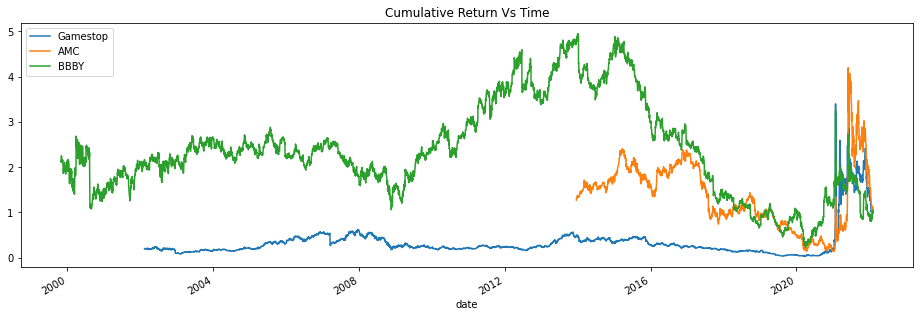

In [123]:
gamestop['Cumulative Return'].plot(label='Gamestop', figsize=(16,5))
amc['Cumulative Return'].plot(label='AMC')
bbby['Cumulative Return'].plot(label='BBBY')
plt.title('Cumulative Return Vs Time')
plt.legend()